## Entanglement Entropy of pure states & The page curve

This test shows how to extract the purity $p_2=\mathrm{Tr}(\rho^2)$ and second R\'enyi entropy $S=-\log_2(p_2)$ from randomized measurements [Brydges et al Science 2019](https://doi.org/10.1126/science.aau4963). 

This is illustrated in the context of the Page curve of Haar pure random states: The curve of the entropy $S$ of reduced systems is expected to show a triangular shape as a function of system size.

In [13]:
using RandomMeas

First we load in memory a random quantum state and calculates the purities accross different cuts

In [14]:
N  = 6 #number of qubits
χ = 2^(N÷2) #a large bond-dimension to consider a typical random state
ξ = siteinds("Qubit", N)
ψ = random_mps(ξ; linkdims=χ);

In [15]:
p = [get_trace_moment(ψ,2,collect(1:NA)) for NA in 1:N]
println("purities ", p);

purities [0.5526688173214818, 0.4354769517257726, 0.3390684413087659, 0.35209773325565263, 0.6106657842792909, 1.0000000000000018]


Then we sample randomized measurements 

In [16]:
NU=100
NM=100
measurement_group = MeasurementGroup(ψ,NU,NM;mode="dense");

In [17]:
ps = zeros(N)
@showprogress dt=1 for NA in 1:N
        ps[NA] = get_purity(measurement_group, collect(1:NA))
end
println("estimated purities ",ps);

estimated purities [0.5606181818181816, 0.4683151515151513, 0.38976363636363653, 0.3335999999999999, 0.6107515151515148, 1.0212909090909088]


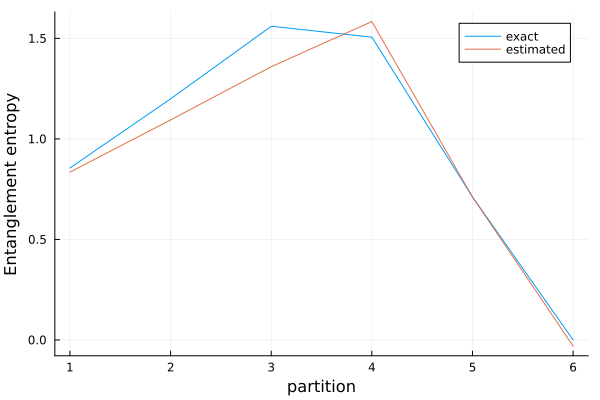

In [18]:
using Plots
Plots.plot(-log2.(p),label="exact")
Plots.plot!(-log2.(ps),label="estimated")
xlabel!("partition")
ylabel!("Entanglement entropy")
#legend()

## Checking that the estimator is unbiased

The estimator of the purity being non-linear w.r.t the measured randomized measurement probabilities, it is important to use unbiased estimators. 
In our code, this is done by applying a bias_correction to the naive biased estimator.

Let us check the performance of our estimator by plotting a collection of estimations obtained from different simulated experiments.

We also compare with what we would get without the bias correction


In [19]:
function get_purity_biased(group::MeasurementGroup, subsystem::Vector{Int} = collect(1:group.N))
    return get_overlap(group, group, subsystem; apply_bias_correction=false)
end


N_exp = 50
NA = N÷2
p_exp = zeros(Float64,N_exp)
p_exp_biased = zeros(Float64,N_exp)

for i_exp in 1:N_exp
    measurement_group = MeasurementGroup(ψ,NU,NM;mode="dense");
    p_exp[i_exp] = get_purity(measurement_group, collect(1:NA))
    p_exp_biased[i_exp] = get_purity_biased(measurement_group, collect(1:NA))
end

The efficiency of the bias correction can be visualized via the simple plot

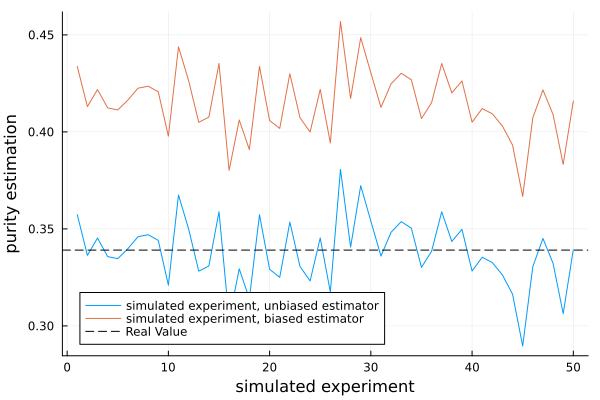

In [20]:
using Plots
plot(1:N_exp,p_exp,label="simulated experiment, unbiased estimator",xlabel="simulated experiment",ylabel="purity estimation")
plot!(1:N_exp,p_exp_biased,label="simulated experiment, biased estimator")
hline!([p[NA]], linestyle=:dash, color=:black, label="Real Value")
